## 1. solving the ODE $y' = 2t$

In [1]:
import numpy as np
import scipy
from scipy.integrate import odeint

tspan = np.linspace(0, 5)
y0 = 0

def model(y, t):
    dydt = 2 * t
    return [dydt]

y = odeint(model, y0, tspan)

Text(0, 0.5, 'y')

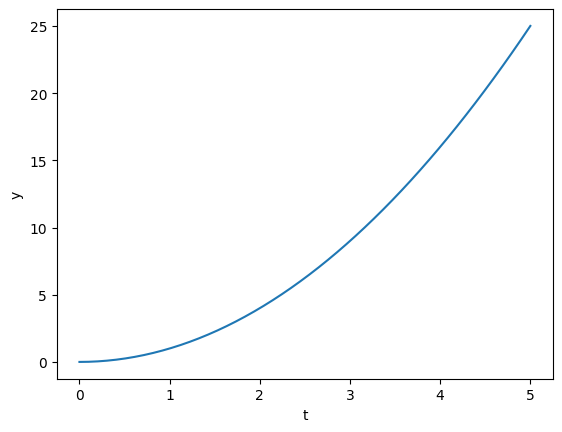

In [2]:
from matplotlib import pyplot as plt
plt.plot(tspan, y)
plt.xlabel('t')
plt.ylabel('y')

## 2. van der pol oscillator

$$ y_1' = y_2$$
$$y_2' = \mu(1 - y_1^2)y_2 - y_1$$

In [3]:
def vdp1(y, t, mu):
    y1, y2 = y
    dy1dt = y2
    dy2dt = mu * (1 - y1**2) * y2 - y1
    return [dy1dt, dy2dt]

mu = 1
t = np.linspace(0, 20, 1000)
Y = odeint(vdp1, [2, 0], t, args=(mu,))

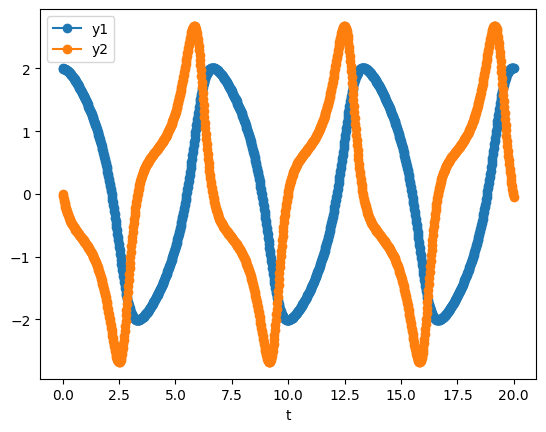

In [4]:
plt.plot(t, Y[:, 0], '-o', label='y1')
plt.plot(t, Y[:, 1], '-o', label='y2')
plt.xlabel('t')
plt.legend()

## 3. finding equilibria

In [6]:
from scipy.optimize import fsolve, _numdiff
t = 0
mu = 1

def get_max_eig(t, mu):
    x, infodict, ier, mesg = fsolve(vdp1, [2, 0], args=(t,mu), full_output=True)

    # numerical approximation of the Jacobian
    J = _numdiff.approx_derivative(lambda x: vdp1(x, t, mu), x)
    eig, vec = np.linalg.eig(J)

    # max real part of the eigenvalues
    a = max(eig.real)
    return a
get_max_eig(t, mu)

np.float64(0.49999999999999994)

Text(0.5, 1.0, 'Max real part of the eigenvalues')

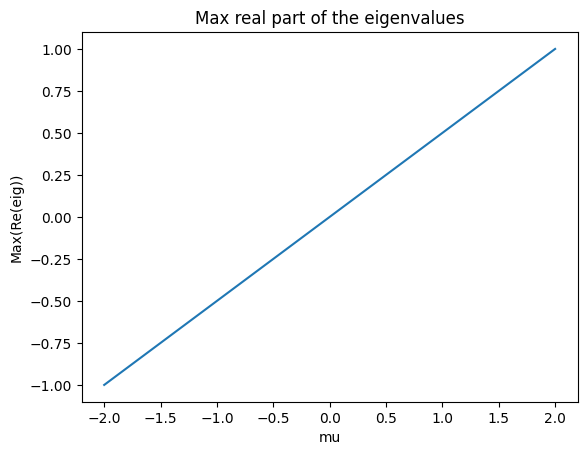

In [ ]:
max_eig_list = []
mu_list = np.linspace(-2, 2, 40)#[-2,-1.9, ..., 1.9,2]
#iterate over mu_list and get the max eigenvalue for each mu
for mu in mu_list:
    max_eig_list.append(get_max_eig(t, mu))
plt.plot(mu_list, max_eig_list)
plt.xlabel('mu')
plt.ylabel('Max(Re(eig))')
plt.title('Max real part of the eigenvalues')